In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r'C:\Users\www\Downloads\Automobile_insurance_fraud.csv')

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
# it is difficult to view in this so we use groupby method 
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'], float64: ['policy_annual_premium', '_c39'], object: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']}

In [6]:
# Float, Int and Object datatypes present in dataset 

In [7]:
# Let's check for duplicated entry if present 
df.duplicated().sum() 

0

In [8]:

df.isin([' ','NA','-','?']).sum().any()

True

In [9]:
df.isin([' ']).any()
df.isin(['?']).any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [10]:
# let's replace ? with NAN 
df = df.replace('?',np.NaN)

In [11]:
# checking missing values in dataset 
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [12]:
# Let's fill null values and remove unnecessary columns 
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)
df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)


In [13]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [14]:
# now we will drop unnecessary columns 
df.drop(['_c39','incident_location','insured_zip','policy_number'],axis=1,inplace=True)

In [15]:
df.shape

(1000, 36)

In [16]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,MALE,MD,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,MALE,Associate,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,16-07-1991,OH,500/1000,1000,1310.80,0,FEMALE,Masters,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,05-01-2014,IL,100/300,1000,1436.79,0,FEMALE,PhD,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,17-02-2003,OH,250/500,500,1383.49,3000000,FEMALE,Masters,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,18-11-2011,IL,500/1000,2000,1356.92,5000000,MALE,Associate,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [17]:
# Policy csl columns is written for personal and vehicle which is splitted by '/' 
# let's convert this in to two columns 
df['CSL_personal'] = df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Accidental']= df.policy_csl.str.split('/',expand=True)[1]

In [18]:
# now we will remove the combined value columns 'policy_csl'
df.drop('policy_csl',axis=1,inplace=True)

In [19]:
# converting date columns into seperate date,month,day columns
# First converting object datatype into date datatype
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [20]:
# splitting and extracting date month and year from data datatype
df['policy_bind_day']=df['policy_bind_date'].dt.day
df['policy_bind_month']=df['policy_bind_date'].dt.month
df['policy_bind_year']=df['policy_bind_date'].dt.year

In [21]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,CSL_personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year
0,328,48,2014-10-17,OH,1000,1406.91,0,MALE,MD,craft-repair,...,52080,Saab,92x,2004,Y,250,500,17,10,2014
1,228,42,2006-06-27,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,3510,Mercedes,E400,2007,Y,250,500,27,6,2006
2,134,29,2000-09-06,OH,2000,1413.14,5000000,FEMALE,PhD,sales,...,23100,Dodge,RAM,2007,N,100,300,6,9,2000
3,256,41,1990-05-25,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,50720,Chevrolet,Tahoe,2014,Y,250,500,25,5,1990
4,228,44,2014-06-06,IL,1000,1583.91,6000000,MALE,Associate,sales,...,4550,Accura,RSX,2009,N,500,1000,6,6,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,1000,1310.80,0,FEMALE,Masters,craft-repair,...,61040,Honda,Accord,2006,N,500,1000,16,7,1991
996,285,41,2014-01-05,IL,1000,1436.79,0,FEMALE,PhD,prof-specialty,...,72320,Volkswagen,Passat,2015,N,100,300,5,1,2014
997,130,34,2003-02-17,OH,500,1383.49,3000000,FEMALE,Masters,armed-forces,...,52500,Suburu,Impreza,1996,N,250,500,17,2,2003
998,458,62,2011-11-18,IL,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,...,36540,Audi,A5,1998,N,500,1000,18,11,2011


In [22]:
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [23]:
df.drop(['policy_bind_date','incident_date'],axis = 1, inplace=True)

In [24]:
df

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,auto_year,fraud_reported,CSL_personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,2004,Y,250,500,17,10,2014,25,1,2015
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,2007,Y,250,500,27,6,2006,21,1,2015
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,2007,N,100,300,6,9,2000,22,2,2015
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,2014,Y,250,500,25,5,1990,10,1,2015
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,2009,N,500,1000,6,6,2014,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,1000,1310.80,0,FEMALE,Masters,craft-repair,paintball,...,2006,N,500,1000,16,7,1991,22,2,2015
996,285,41,IL,1000,1436.79,0,FEMALE,PhD,prof-specialty,sleeping,...,2015,N,100,300,5,1,2014,24,1,2015
997,130,34,OH,500,1383.49,3000000,FEMALE,Masters,armed-forces,bungie-jumping,...,1996,N,250,500,17,2,2003,23,1,2015
998,458,62,IL,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,base-jumping,...,1998,N,500,1000,18,11,2011,26,2,2015


In [25]:
df.sample(50)

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,auto_year,fraud_reported,CSL_personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
620,438,57,OH,500,1119.29,0,FEMALE,MD,machine-op-inspct,chess,...,2000,Y,500,1000,5,10,1991,15,1,2015
416,328,49,OH,500,1434.51,0,FEMALE,Masters,transport-moving,bungie-jumping,...,2005,N,500,1000,1,10,2001,23,2,2015
447,352,53,IL,500,1793.16,0,MALE,Associate,tech-support,exercise,...,2009,N,250,500,12,7,2013,15,1,2015
837,9,24,IL,2000,1304.46,0,FEMALE,PhD,machine-op-inspct,golf,...,2001,Y,100,300,25,5,2002,31,1,2015
710,234,44,IN,500,1780.67,0,MALE,Associate,other-service,exercise,...,2012,Y,500,1000,6,6,2002,19,2,2015
63,215,42,OH,500,1848.81,0,MALE,JD,transport-moving,video-games,...,2003,Y,500,1000,28,10,2008,6,2,2015
309,165,36,IL,2000,1247.87,0,MALE,Masters,armed-forces,golf,...,2008,N,250,500,1,10,2010,14,1,2015
376,72,29,OH,500,973.80,0,FEMALE,Associate,craft-repair,exercise,...,2013,N,500,1000,6,8,1994,16,1,2015
518,196,41,IL,2000,1800.76,0,MALE,JD,protective-serv,camping,...,2009,N,250,500,5,7,2001,14,1,2015
364,291,46,OH,1000,994.74,0,FEMALE,High School,adm-clerical,polo,...,2005,Y,500,1000,13,4,2006,25,1,2015


In [26]:
# As incident Year is 2015 only we will remove that column 

In [27]:
df.drop(['incident_year'],axis = 1, inplace=True)

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00
bodily_injuries,1000.0,9.920000e-01,8.201272e-01,0.00,0.0000,1.0,2.000,2.00


In [29]:
# list of categorical data 
Category = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
            'auto_make', 'auto_model', 'fraud_reported', 'CSL_Accidental','CSL_personal']

In [30]:
# encoding categorical data into numerical 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i]= le.fit_transform(df[i])
df

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,auto_model,auto_year,fraud_reported,CSL_personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,328,48,2,1000,1406.91,0,1,4,2,17,...,1,2004,1,1,2,17,10,2014,25,1
1,228,42,1,2000,1197.22,5000000,1,4,6,15,...,12,2007,1,1,2,27,6,2006,21,1
2,134,29,2,2000,1413.14,5000000,0,6,11,2,...,30,2007,0,0,1,6,9,2000,22,2
3,256,41,0,2000,1415.74,6000000,0,6,1,2,...,34,2014,1,1,2,25,5,1990,10,1
4,228,44,0,1000,1583.91,6000000,1,0,11,2,...,31,2009,0,2,0,6,6,2014,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,1000,1310.80,0,0,5,2,13,...,6,2006,0,2,0,16,7,1991,22,2
996,285,41,0,1000,1436.79,0,0,6,9,17,...,28,2015,0,0,1,5,1,2014,24,1
997,130,34,2,500,1383.49,3000000,0,5,1,3,...,19,1996,0,1,2,17,2,2003,23,1
998,458,62,0,2000,1356.92,5000000,1,0,5,0,...,5,1998,0,2,0,18,11,2011,26,2


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   int32  
 7   insured_education_level      1000 non-null   int32  
 8   insured_occupation           1000 non-null   int32  
 9   insured_hobbies              1000 non-null   int32  
 10  insured_relationship         1000 non-null   int32  
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_type      

In [32]:
# All data converted into num datatypes now we are good to go 

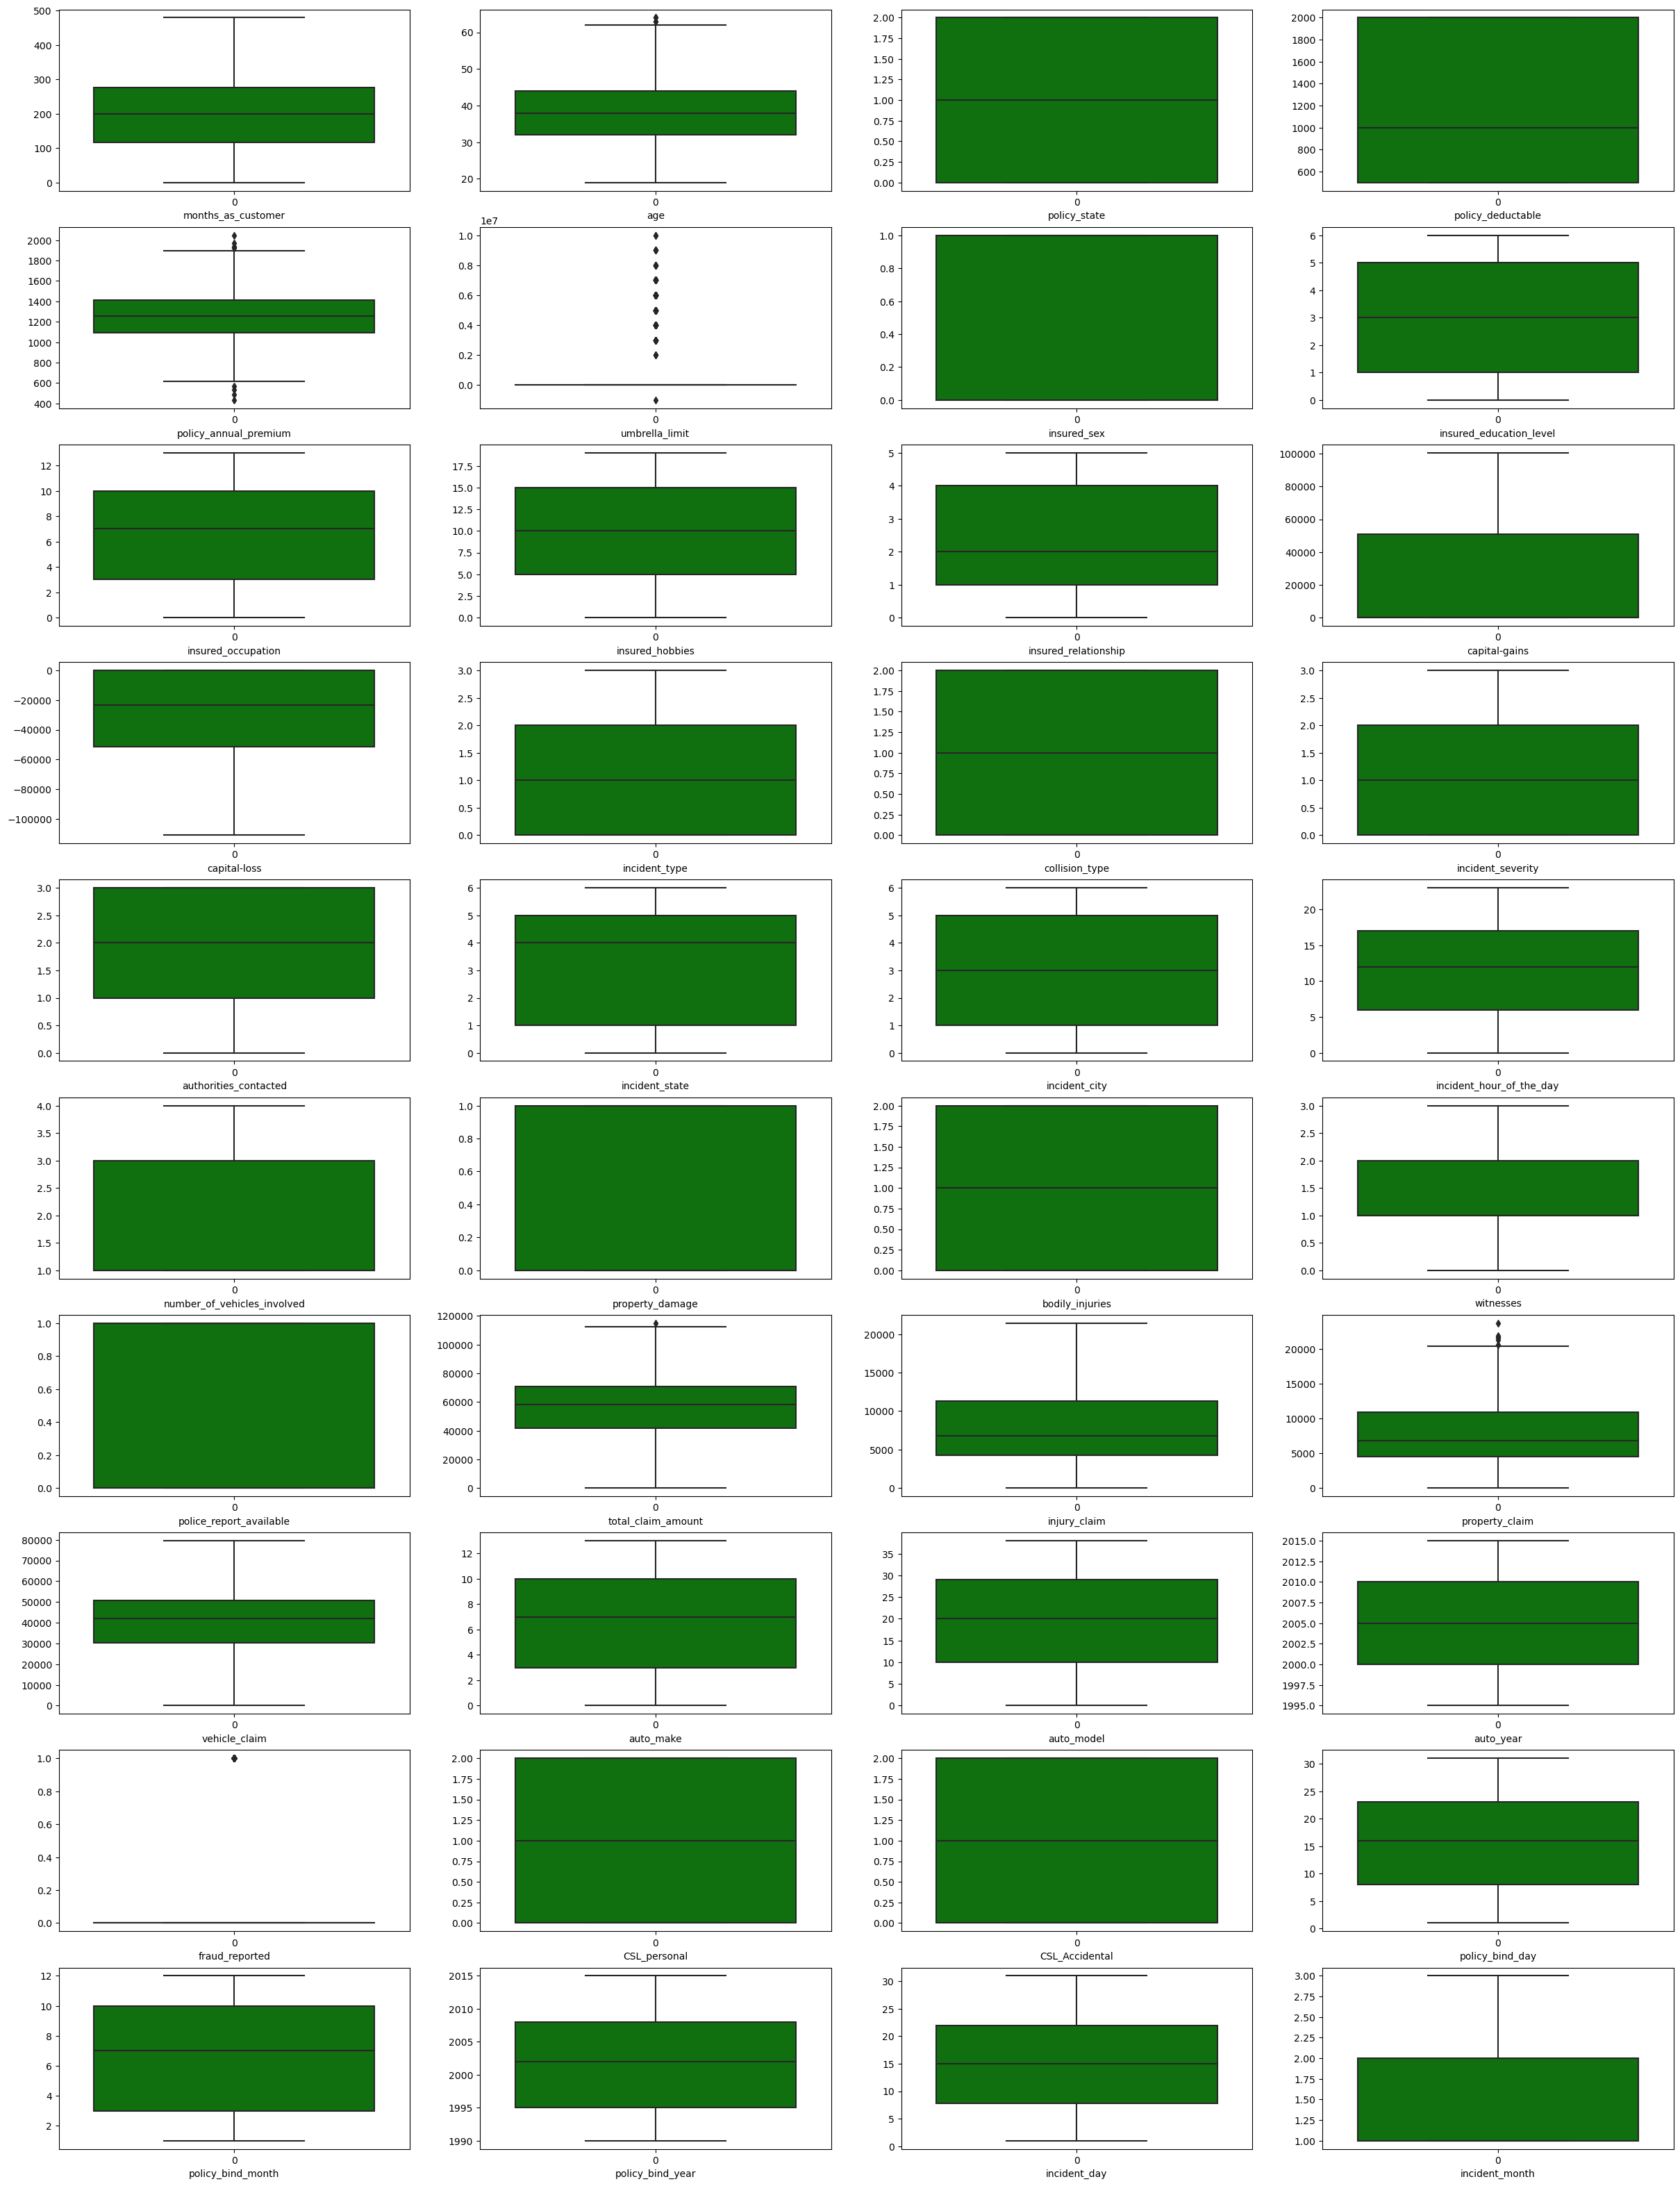

In [33]:
plt.figure(figsize=(30,40),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [34]:
# some columns are having outliers , we use Zscore to remove it 
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis=1)]

In [35]:
df = df1.copy()

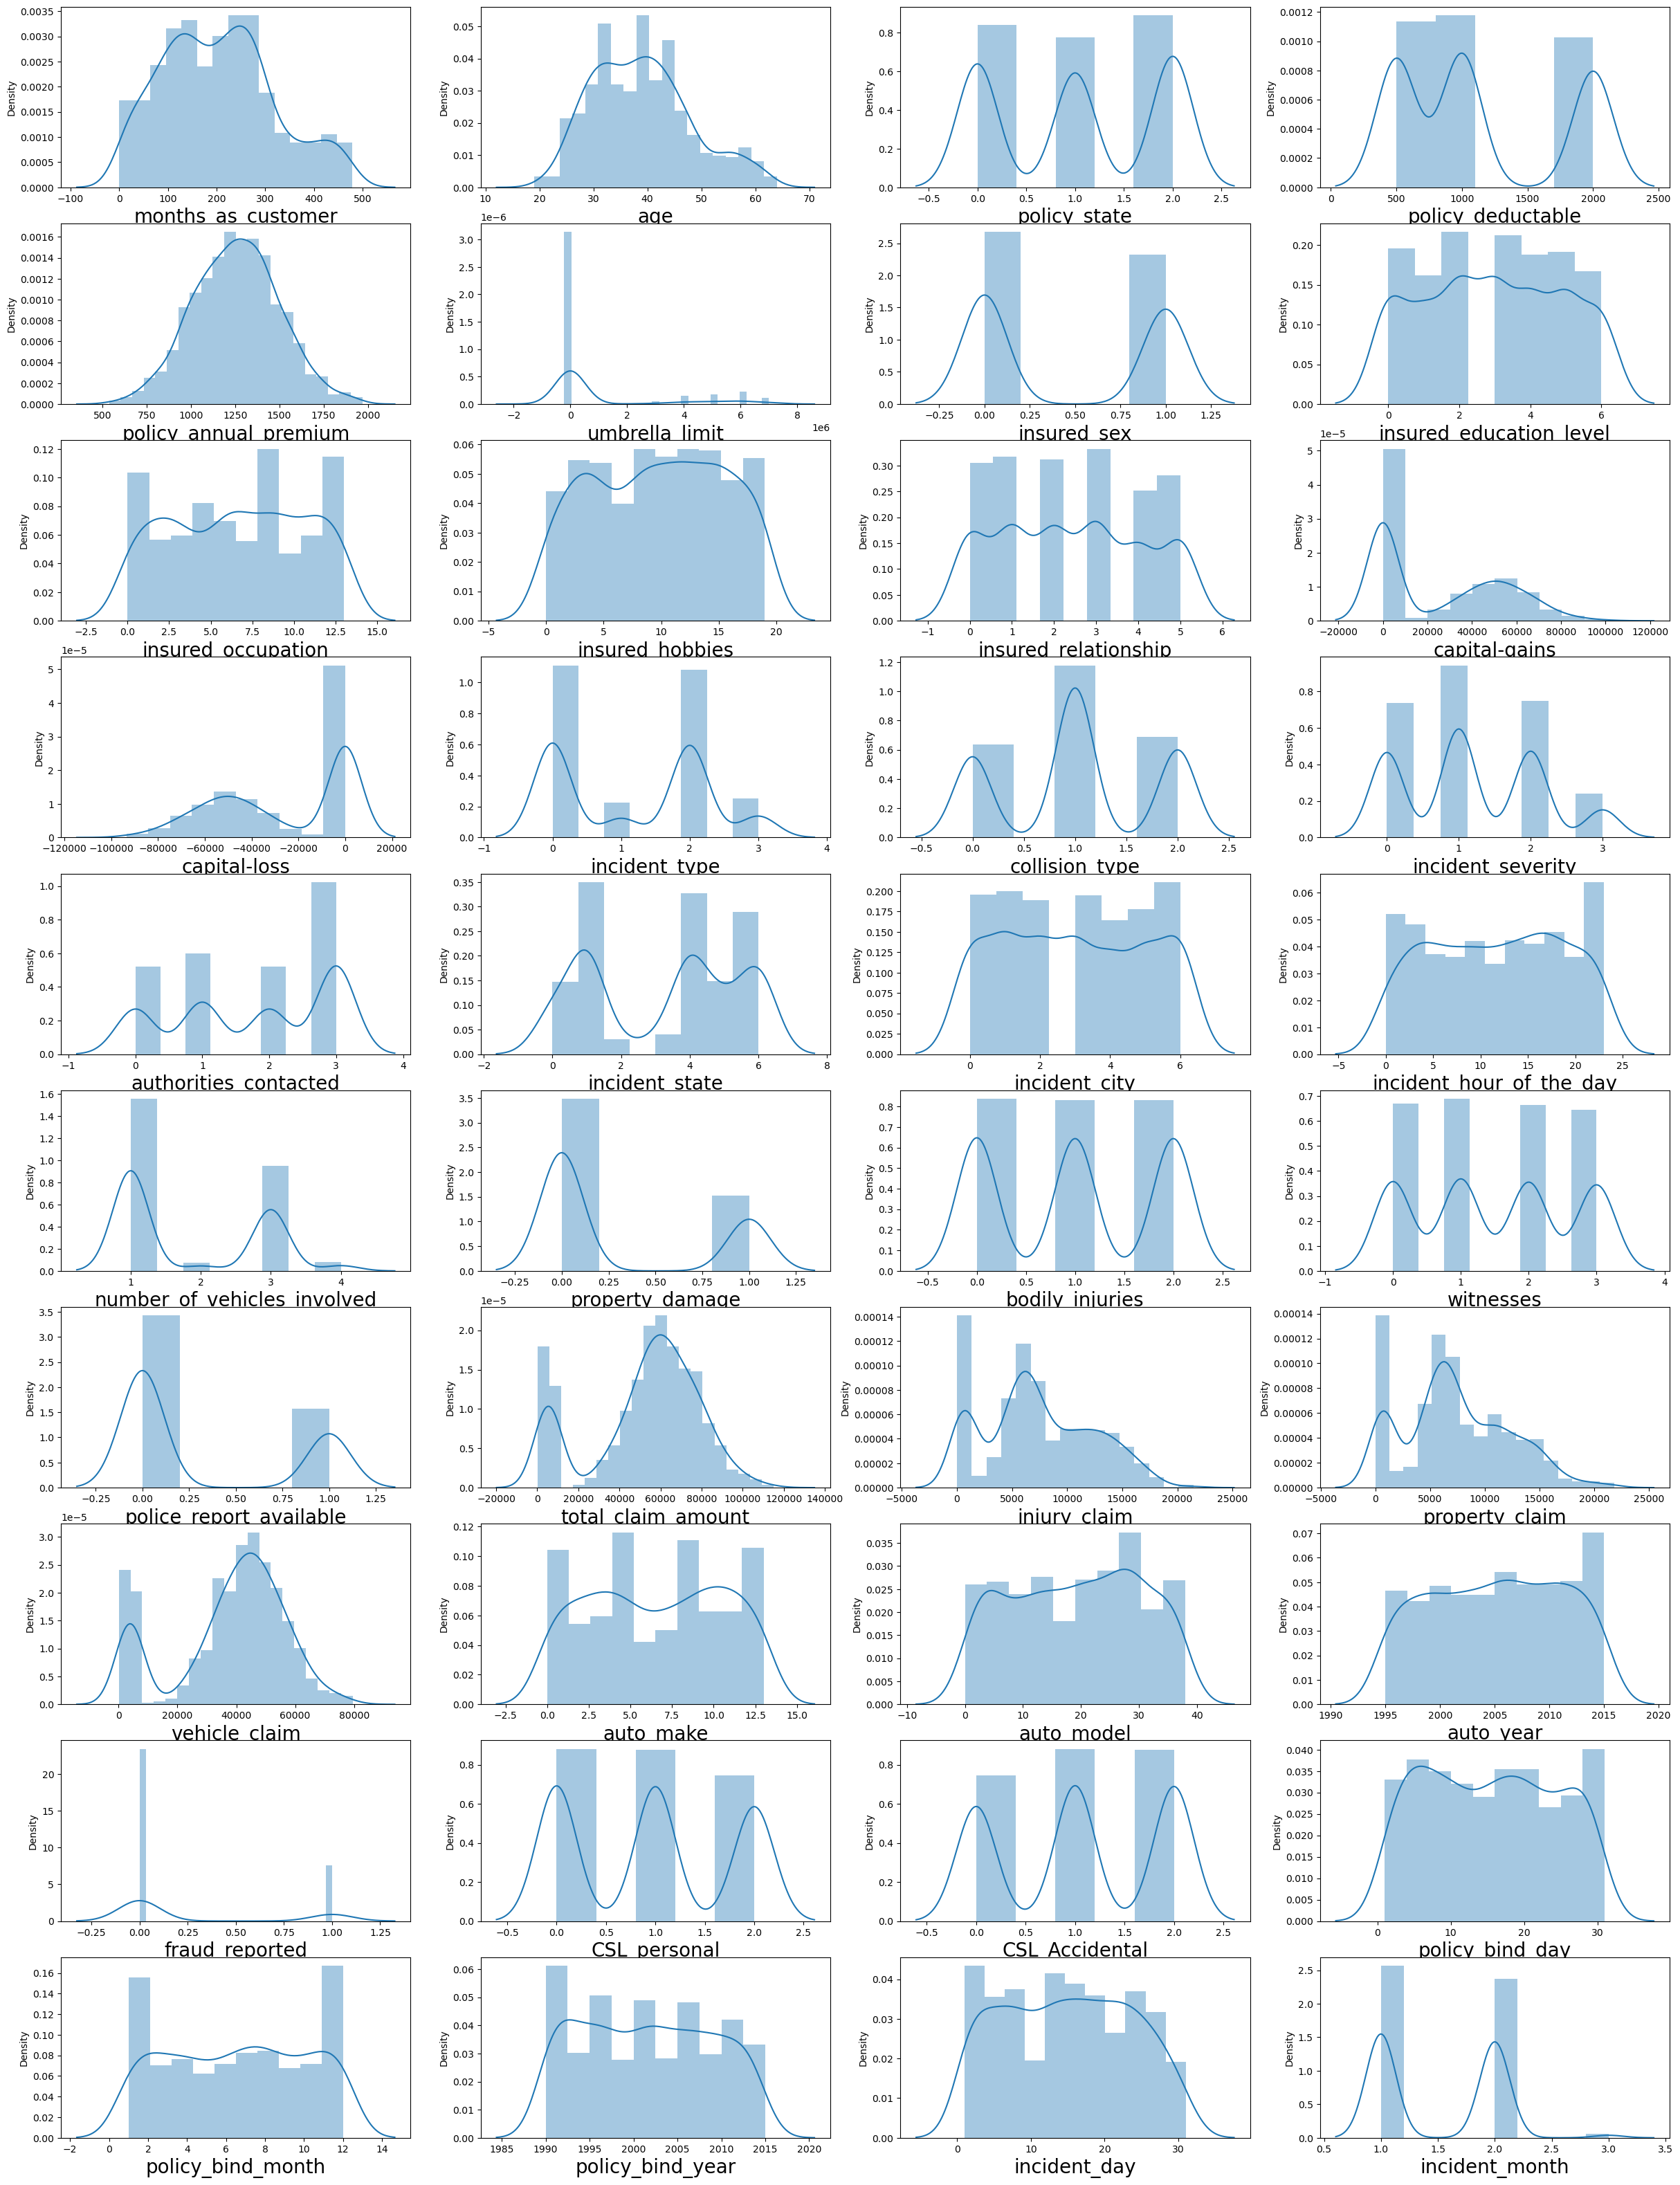

In [36]:
# Lets check the data distribution 
plt.figure(figsize=(30,40))
plotnum=1
for col in df:
    if plotnum <=40:
        plt.subplot(10,4,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [37]:
df.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.296476
incident_state                -0.149255
incident_city                  0.043882
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage                0.853093
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.796221


In [38]:
# no need to perform data transformation as not much skewness is seen in continous variables 

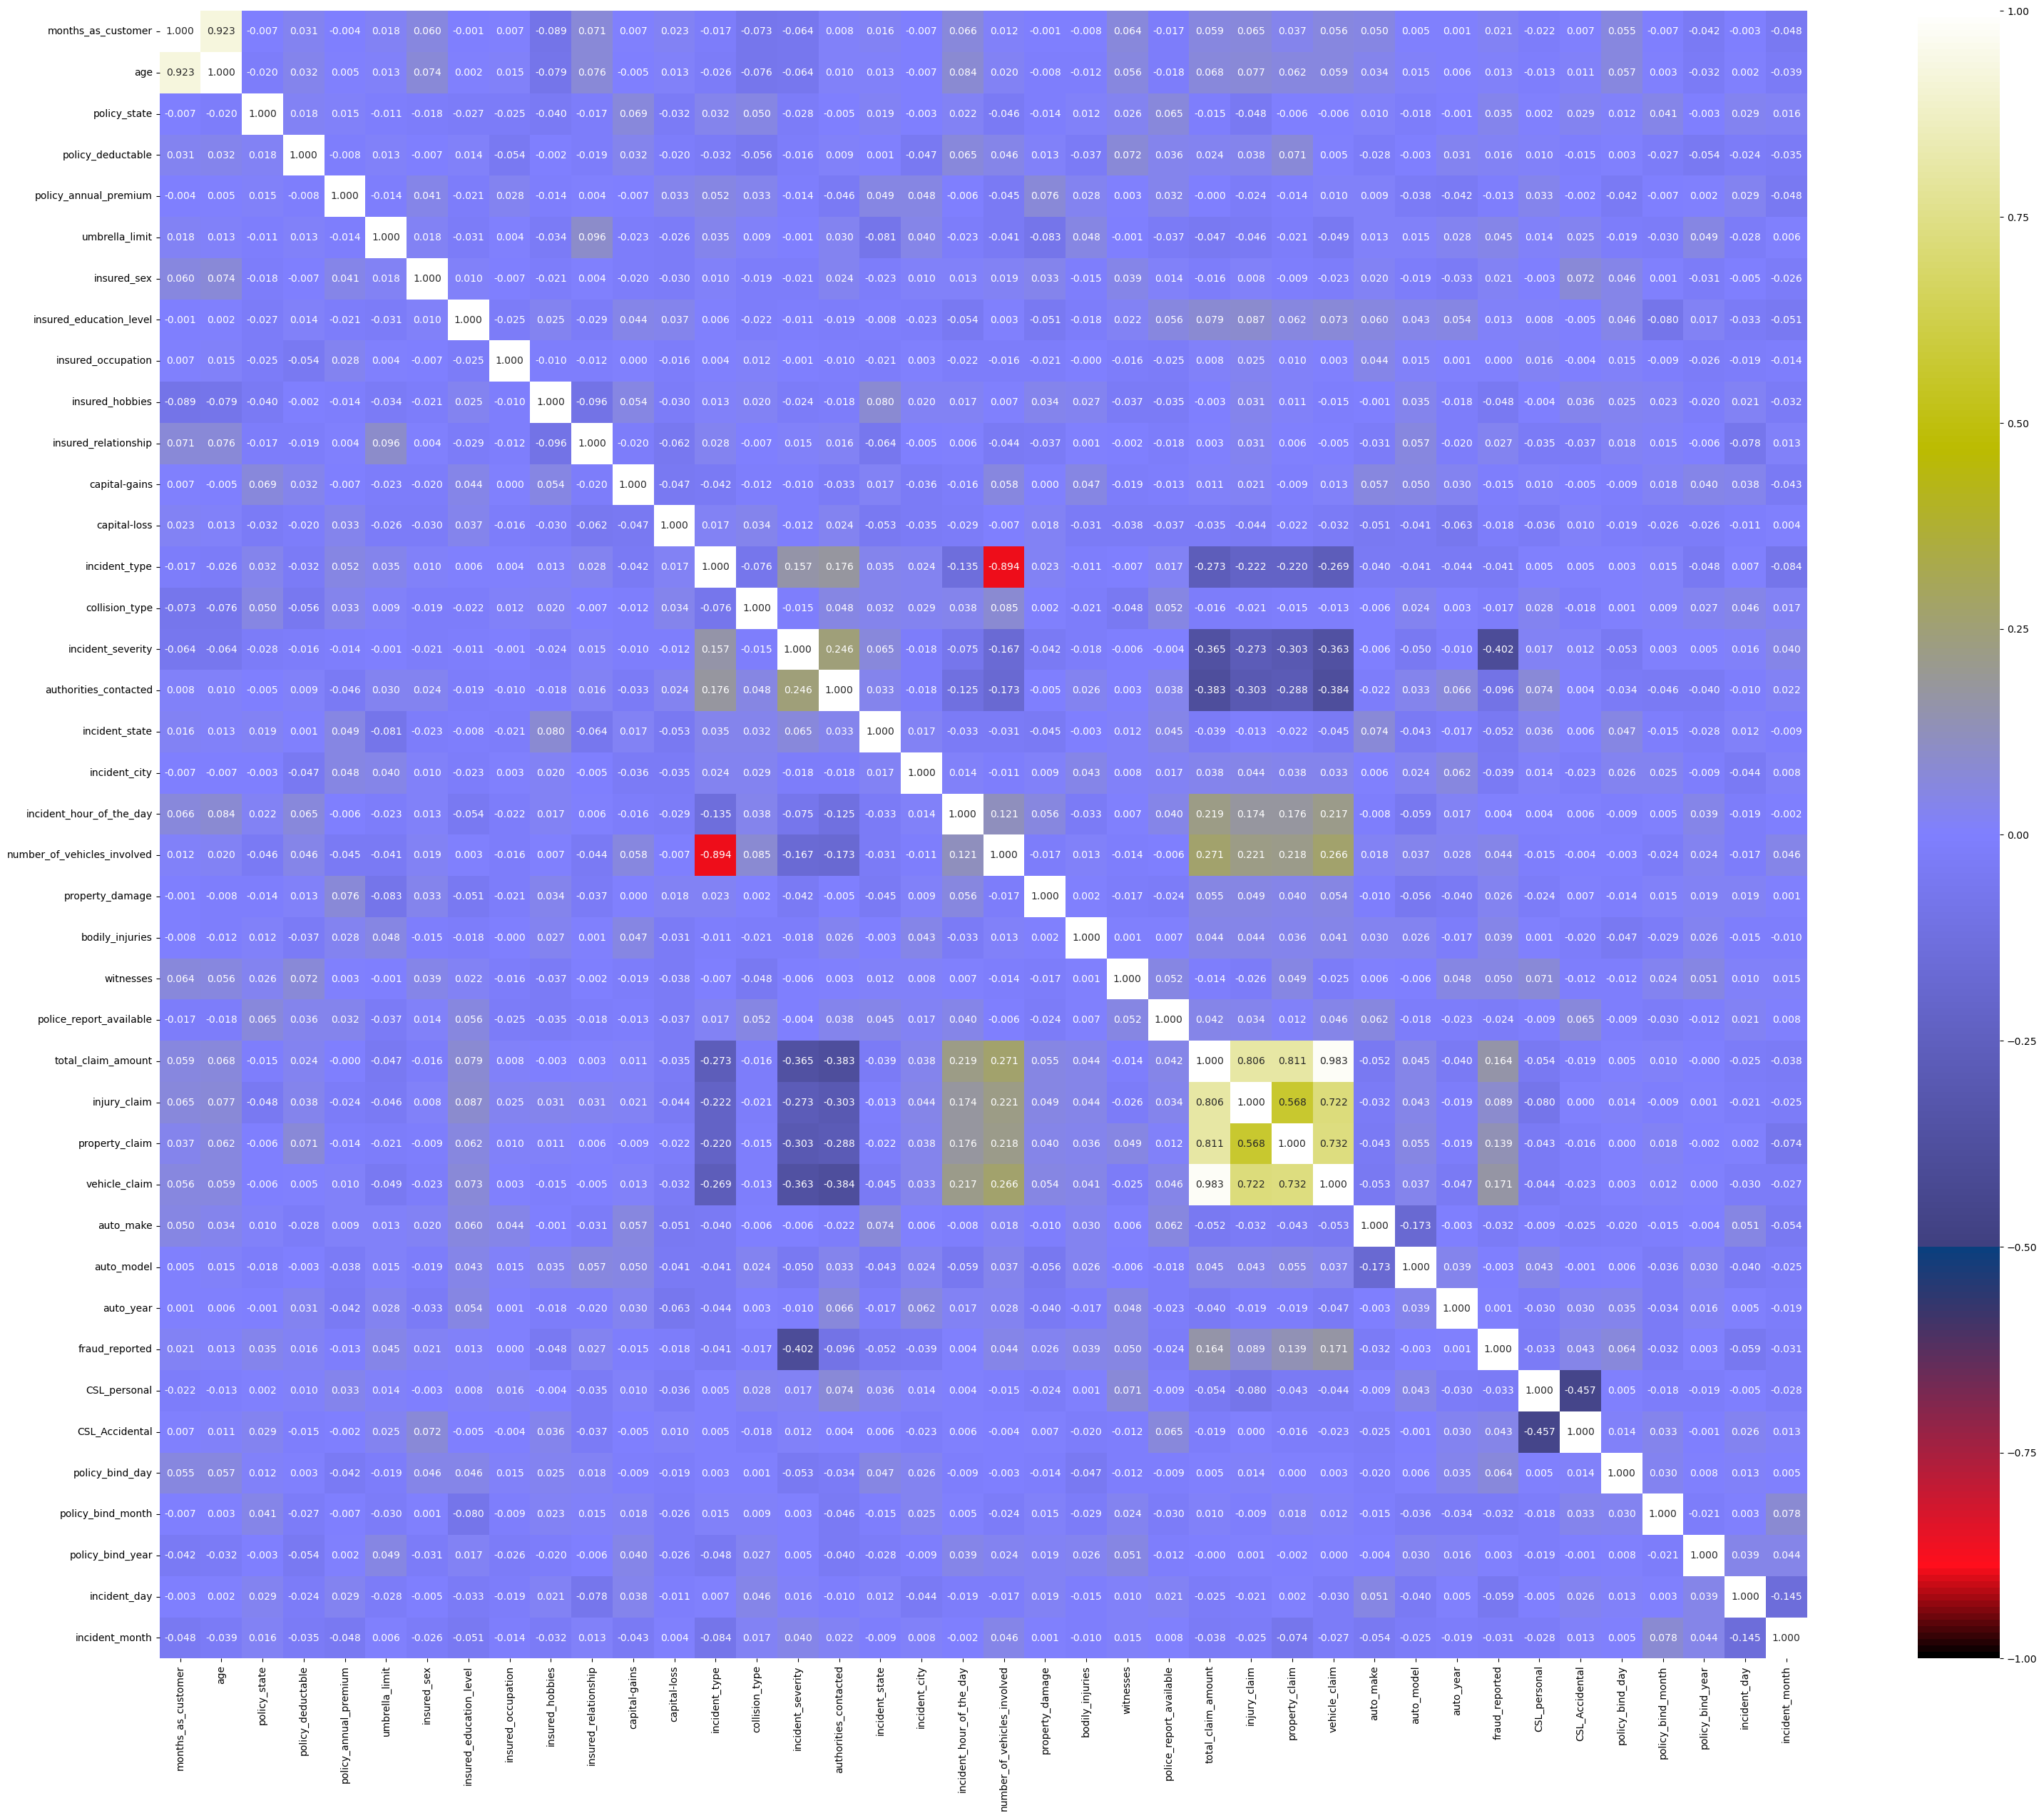

In [39]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', cmap="gist_stern")
plt.show()

In [40]:
# let's check for data balance 
df.fraud_reported.value_counts()

fraud_reported
0    740
1    240
Name: count, dtype: int64

In [41]:
# using SMOTE to balance the target variable 
from imblearn.over_sampling import SMOTE

In [42]:
X = df.drop(['fraud_reported'],axis=1)
Y = df['fraud_reported']

In [43]:
oversample = SMOTE()
X,Y = oversample.fit_resample(X,Y)


In [44]:
Y.value_counts()

fraud_reported
1    740
0    740
Name: count, dtype: int64

In [45]:
# Label is balanced now 

# standard scaling

In [46]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

# Using PCA 

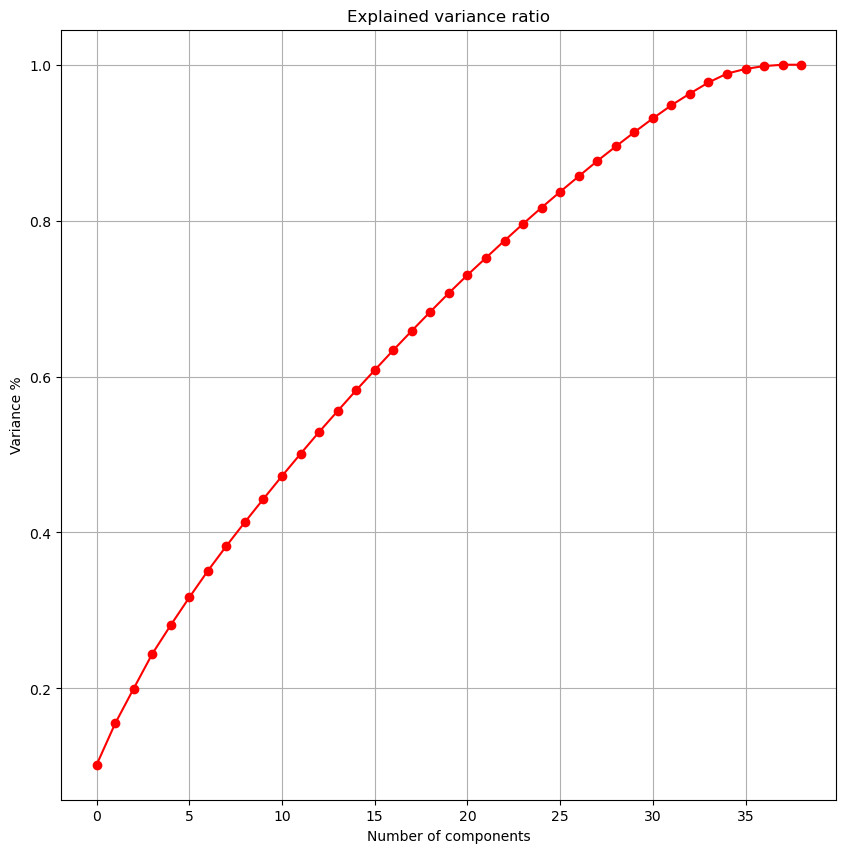

In [47]:
from sklearn.decomposition import PCA 
pca = PCA()
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'ro-')
plt.xlabel('Number of components')
plt.ylabel('Variance %')
plt.title('Explained variance ratio')
plt.grid()

In [48]:
# As per the graph 30 components are comtributing more than 90% of data 

In [49]:
pca_new = PCA(n_components=30)
x_new = pca_new.fit_transform(X_scale)

In [50]:
new_data = pd.DataFrame(x_new,columns = np.arange(30))

# Model building 

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(new_data,Y,random_state=300,test_size=0.3)

In [53]:
# Building base model Logistic Regressio 
lr = LogisticRegression()
lr.fit(X_train,Y_train)
y_pred = lr.predict(X_test)

In [54]:
accuracy_score(Y_test,y_pred)

0.786036036036036

In [59]:
# Building other classification model 
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')


Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.786036036036036


Confusion matrix : 
 [[180  42]
 [ 53 169]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.81      0.79       222
           1       0.80      0.76      0.78       222

    accuracy                           0.79       444
   macro avg       0.79      0.79      0.79       444
weighted avg       0.79      0.79      0.79       444



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8018018018018018


Confusion matrix : 
 [[191  31]
 [ 57 165]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       222
           1       0.84      0.74      0.79       222

    accuracy                           0.80       444
   macro avg       0.81      0.80      0.80       444
weighted avg       0.81      0.80      0.80      

In [60]:
# Extra tree classifier gives highest score 
# so we tune hyperparameter for this model to gain higher accuracy 
from sklearn.model_selection import GridSearchCV
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400]
             }

In [61]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 1/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 2/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 3/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 4/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=10)

In [63]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 300}

In [64]:
Final_mod = ExtraTreesClassifier(criterion='gini',n_estimators= 300, max_depth=30 ,
                                 min_samples_split= 3, max_features= 'log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)

In [65]:
accuracy_score(Y_test,y_pred)

0.8400900900900901

In [67]:
con_matrix = confusion_matrix(Y_test,y_pred)

In [68]:
con_matrix

array([[204,  18],
       [ 53, 169]], dtype=int64)

In [69]:
import joblib
joblib.dump(Final_mod,'Insurance_claims_Final.pkl')

['Insurance_claims_Final.pkl']